In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
import metric_learn

In [3]:
%pylab inline
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


### Explore the shape and data included in the spectra files on an example

In [4]:
data = pd.read_csv('Critical_KMONs/2017-1-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A.csv')
data.head()

,Name,Run Time,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
0,A,2.0,753,742,733,724,714,709,705,704,...,869,824,901,1280,1552,1414,952,872,1080,1081
1,A,4.0,957,926,898,870,846,829,816,806,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
2,A,6.0,1065,1024,985,945,912,887,872,858,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
3,A,8.0,1066,1022,984,947,914,886,873,861,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
4,A,10.0,1068,1025,985,947,913,889,868,857,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


In [5]:
data.shape

(362, 1203)

In [6]:
# here we adjust the df's row and column indexes 
data_df = data.rename(columns ={'Run Time':'Time'}, inplace = True)
data_df = data.drop('Name', 1)
data_df.set_index('Time', inplace = True)
data_df.columns.name = 'Wavelength'

data_df.head()

Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,753,742,733,724,714,709,705,704,702,698,...,869,824,901,1280,1552,1414,952,872,1080,1081
4.0,957,926,898,870,846,829,816,806,801,794,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
6.0,1065,1024,985,945,912,887,872,858,848,841,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
8.0,1066,1022,984,947,914,886,873,861,852,843,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
10.0,1068,1025,985,947,913,889,868,857,850,842,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


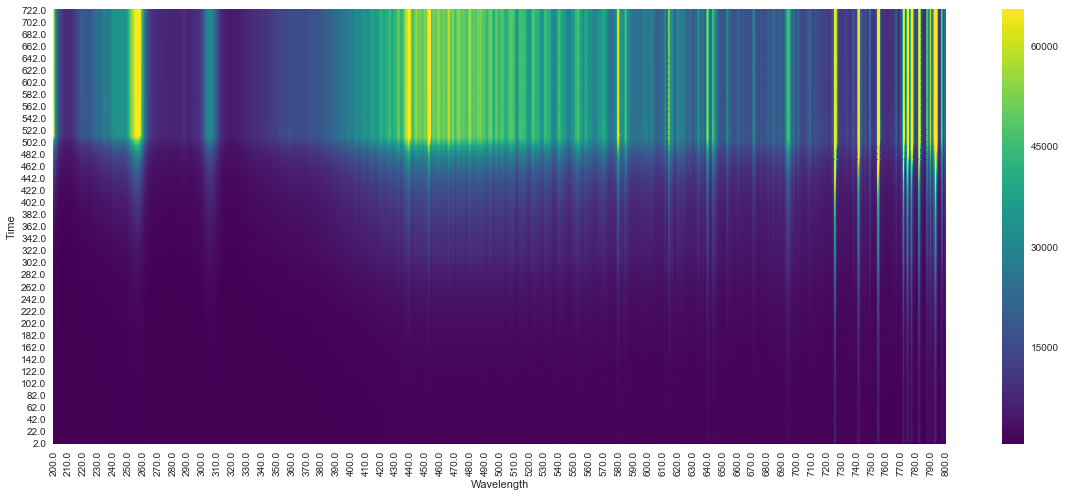

In [7]:
#create seaborn heatmap of data
sns.set_context(rc={"figure.figsize": (20,8)})                                   #increase figure size
ax = sns.heatmap(data_df, xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                #invert Y axis 

(1201,)


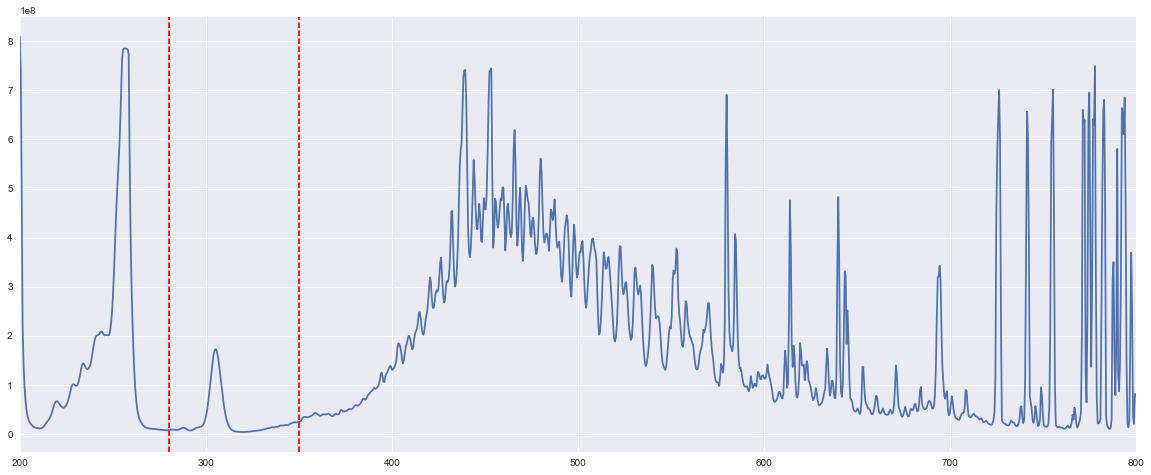

In [8]:
#calculate and plot std over each column in the spectra_image
var_df = numpy.var(data_df, axis = 0)
ax = plot(var_df)
plt.xlim((200,800))
plt.axvline(x=280, c = 'r', linestyle = '--')
plt.axvline(x=350, c = 'r', linestyle = '--')
print (var_df.shape)


### Not a great resolution in the heatmap.  Range of intensity scales from hundreds to >60k.  Let's do a log rescale to see  if the data looks better.


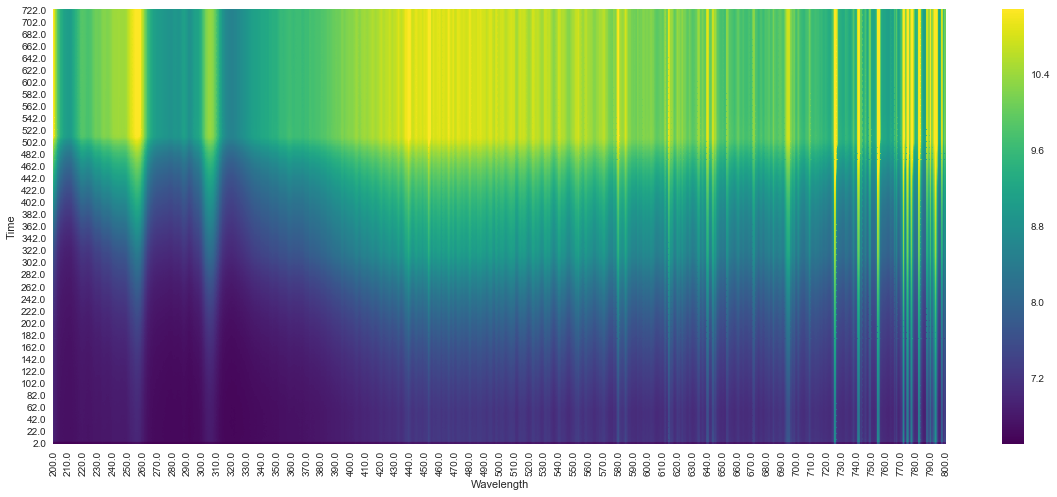

In [9]:
#log scale of data for our heatmap  

ax = sns.heatmap(log(data_df), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

In [10]:
#scaling the df by taking the log
log_df = log(data_df)
rangelog_df = (log_df.max()-log_df.min())
print (rangelog_df.min())
print (rangelog_df.max())

2.0402649452
4.46625914312


Log scale is much better.
Total time is 722s
EP time near 510s is evident, remainder of time is what is known as overetch.  This portion determines the etched feature profile and final CD.  We may consider using log_df when performing data analysis later.


In [165]:
'''
need to scroll through my training data and open the csv files into a df.  will store this is a dict of key:value pairs
key = string filename that includes the IMOxxxxxx identifier which will be used to match to 'Error' value 
value = dataframe made up of the csv file data 
'''
import glob
import pprint

top_dataLists = {}                                                      #initialize our dict to be filled w df's from csv files

for datafile in sorted(glob.glob(r"\\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\*spectra_A_IMO*")):   #use glob to aggregate files/folders into our dict
    '''perform the column indexing and transposing to get each df in correct format.'''
    df = pd.read_csv(datafile)  
    df.rename(columns ={'Run Time':'Time'}, inplace = True)
    df = df.drop('Name', 1)
    df.set_index('Time', inplace = True)
    df.columns.name = 'Wavelength'
    
    '''Need to match the Label categorization for the lots'''
    
    
    
    
    '''End matching'''
    id = str(re.findall('(?<=_A_)[A-Z0-9]+', datafile))
    df = df.iloc[0:350]                                       #will need arrays of all same length so use only the first 350 rows
    top_dataLists[id] = df                                        #populate dict values with each raw csv file of interest
    #dataLists[id] = log(df)                                   #populate dict values with log value csv
    
    
    print('datafiles loaded:',datafile)
    #pprint.pprint (glob.glob("Critical_KMONs/*spectra_A*"))        #checking files pulled for debug

#dataLists                                                          #check it if needed for debug
print('Last file opened:',datafile)                                                     #print last filename opened
df.head()                                                           #show the last dataframe loaded into dict

datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-03-14-33-19_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO294852.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-08-17-44-47_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO305019.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-13-44-05_DET7AEP01_PodB_CHA_KMON_Step0_spectra_A_IMO308131.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A_IMO308056.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-23-36-27_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO306885.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-13-13-46-51_DET7AEP02_PodB_CHA_KMON_Step0_spectra_A_IMO308310.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-13-20-31-

Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,736,728,720,710,704,699,694,693,693,691,...,876,834,910,1307,1571,1416,956,879,1099,1090
4.0,917,890,864,839,820,803,795,788,782,776,...,1259,1142,1347,2415,3135,2717,1463,1278,1861,1828
6.0,1045,1003,965,928,898,877,860,847,838,830,...,1262,1148,1358,2390,3081,2674,1462,1281,1844,1812
8.0,1053,1010,970,931,902,880,862,849,839,830,...,1251,1142,1342,2346,3019,2625,1451,1269,1810,1778
10.0,1052,1008,967,930,905,878,860,849,838,828,...,1249,1143,1334,2325,2993,2607,1448,1264,1791,1763


In [166]:
#we can see the number of data points available that have spectra <- not all of these will have an 'Error' value but all 
#runs with an 'Error' should be found.  Verify later in code.
dataLists = top_dataLists 
print (len(top_dataLists))

170


### The above sequence of code has loaded all of the datasets into a dictionary of dataframes that each represents a run of data that will be labeled according to the corresponding Error for that lot.

In [167]:
#this cell will randomly select 10 runs from the list of runs in dataLists and add 2 false spikes at 280 & 350, which are
#known to be low variability regions on the runs for this analysis.  This will be used to validate the ability to catch
#outliers based on the traces

import random
outliers = random.sample(list(dataLists), 10)
print ('generate perturbed anomalies \n', outliers)

#create list for block of time that will be used to insert the false signal 
times = [0]*100
i = 3
while i < len(times):
    times[i] = times[i-1] + 2  #every 2 seconds per the df index of datafiles
    i +=1


#create dataframe of the lot ID which will be labeled as 1|0
labels = []
for k,v in dataLists.items():
    labels.append(k)
labels_df = pd.DataFrame(labels)
labels_df.columns = ['ID']
labels_df['Label'] = ''
labels_df.set_index('ID', inplace = True)


for k in dataLists:
    if k in outliers:
        labels_df.at[k,'Label'] = 1
        #print(k,'\n', dataLists[k])
        outlier_df = dataLists[k]
        
        for i in times:                         #cycle through time row in times list and change the output signal
            outlier_df.at[i, '279.0'] = 50000
            outlier_df.at[i, '279.5'] = 50000
            outlier_df.at[i, '280.0'] = 50000
            outlier_df.at[i, '280.5'] = 50000
            outlier_df.at[i, '281.0'] = 50000
            outlier_df.at[i, '349.0'] = 50000
            outlier_df.at[i, '349.5'] = 50000
            outlier_df.at[i, '350.0'] = 50000
            outlier_df.at[i, '350.5'] = 50000
            outlier_df.at[i, '351.0'] = 50000
                                           
        dataLists[k] = outlier_df.dropna()              #reassign the new outlier peak dataframe back to dataLists
        some_spectra = outlier_df
        #print('after replace', dataLists[k])
        
    else: labels_df.at[k,'Label'] = 0           #label lots not changed as normal

labels_df.loc[labels_df['Label'] == 1]  
#print and confirm our label IDs match random runs that have generated outlier peaks 
#the is our new y training labels

generate perturbed anomalies 
 ["['IMO308919']", "['IMO316883B']", "['IMO309007']", "['IMO311425A']", "['IMO308059']", "['IMO314598A']", "['IMO314596A']", "['IMO318405C']", "['IMO294847']", "['IMO318400']"]


,Label
ID,
['IMO308059'],1
['IMO308919'],1
['IMO311425A'],1
['IMO294847'],1
['IMO314598A'],1
['IMO309007'],1
['IMO314596A'],1
['IMO316883B'],1
['IMO318400'],1


(1201,)


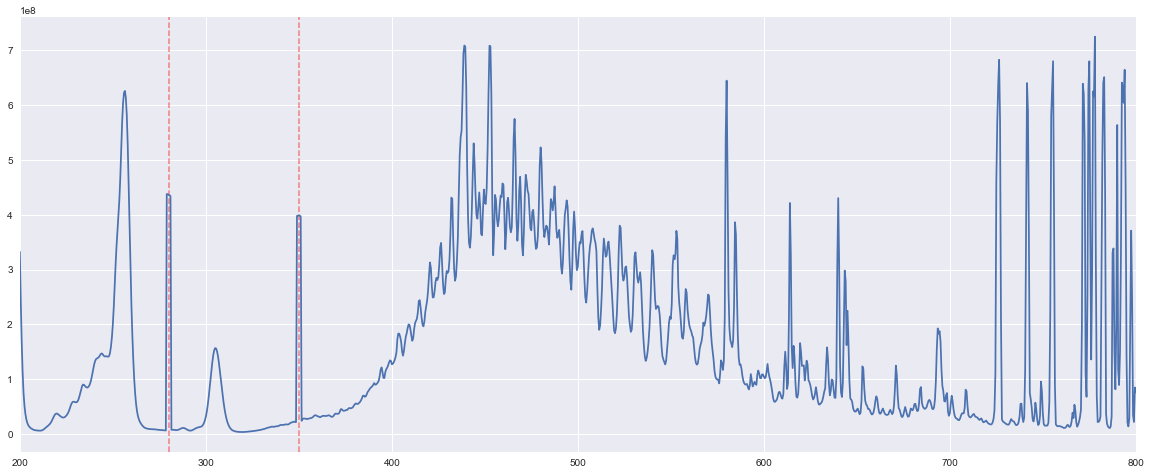

In [168]:
#plot of last value in outlier df to show the new variability spikes
var_df = numpy.var(some_spectra, axis = 0)
plt.xlim((200,800))
plt.axvline(x=280, c = 'r', linestyle = '--', alpha =0.4)
plt.axvline(x=350, c = 'r', linestyle = '--', alpha = 0.4)
ax = plot(var_df)
print (var_df.shape)

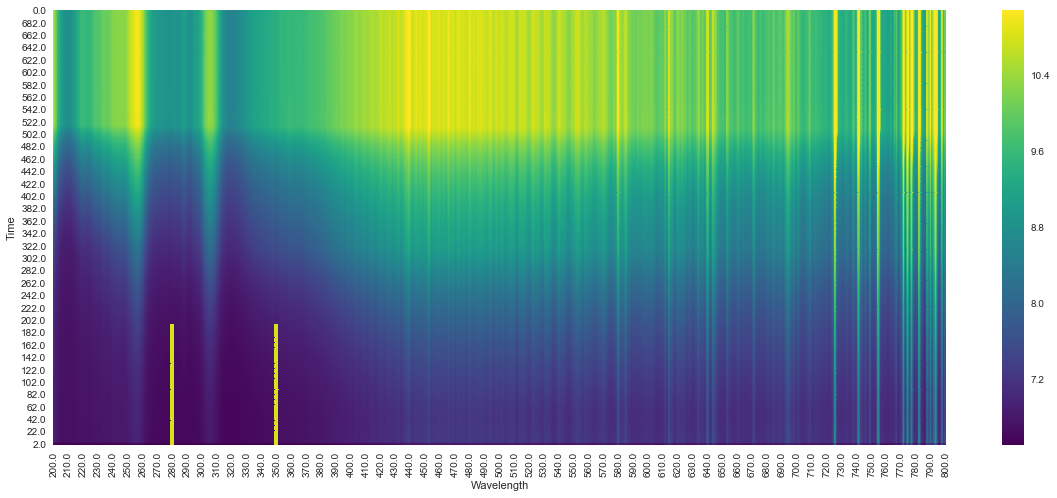

In [169]:
#heat map for new created anomylous samples
some_spectra_image = some_spectra
ax = sns.heatmap(log(some_spectra_image), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()         

In [170]:
dataLists2 = {}
matchcounter = 0
missingcounter = 0
for k in dataLists:
    if k in labels_df.index:
        category = labels_df.at[k,'Label']
        #print (k, category)
        dataLists2[k] = (category, dataLists[k])
        matchcounter +=1
        #if category == 1: print(k,'\n',dataLists2[k])   #validation line for checking all the outliers
    else: 
        '''Lot not in dataLists'''
        missingcounter += 1
        continue
print ('missing', missingcounter)
print ('match', matchcounter)


missing 0
match 170


In [171]:
print (len(dataLists2)) #only matches of spectra and error data
print (type(dataLists2))

170
<class 'dict'>


In [172]:
y = {} # our labels
X = {} # our spectra data
for k,(label, spectra) in dataLists2.items():
    y[k] = label
    X[k] = spectra
    last = k
print ('last key', k)
X[k].head()
print (type(X))


last key ['IMO319397']
<class 'dict'>


### unpack the dictionary tuples to make numpy arrays of the values for labels and spectra and prep the data formats into ndarrays suitable for sklearn modules.

In [173]:
y = [] # our labels
X = [] # our spectra data

for k,(label, spectra) in dataLists2.items():
    y.append(label)
    X.append(spectra.values)
    #print(spectra.shape[0])
    #if spectra.shape[0] < minim: minim = spectra.shape[0]
    last = k
    
print(type(X))
#print('minum', minim)

y = (numpy.array(y))       #flat array of #samples
X = (numpy.array(X))       #give me a 3-D array (#samples,350,1201)
print('X shape:', X.shape)
print('y shape:', y.shape)

# sklearn will require 2D array for data input so we will flattend 3D array to 2D 350x1201 = 42350
nsamples,nx,ny = X.shape
d2_X = X.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X.shape)
#print('last spectra array \n',X[-1])

<class 'list'>
X shape: (170, 350, 1201)
y shape: (170,)
reshaped d2_X: (170, 420350)


In [174]:
#attempt metric learn w toy that uses every other column to prevent MemoryErrors
X_e2c = X[:,::2]
nsamples,nx,ny = X_e2c.shape
d2_X_e2c = X_e2c.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X_e2c.shape)
print('labels y shape:', len(y))
#print('last spectra array \n',X[-1])
                
#print('reshaped d2_X_toy:', d2_X_toy.shape)
#print('labels y_toy shape:', len(y_toy))

reshaped d2_X: (170, 210175)
labels y shape: 170


In [175]:
'''
Same as next cell but this cell is using ALL data columns and may hit memory errors w higher frequency
'''
### for saving csv files in as x(good) and y(anomylous) to utilize conditional T-test in Rstudio
y_R_anom = []
x_R_good = []
for k,(label, spectra) in dataLists2.items():
    if label == 1:
        y_R_anom.append(spectra.values)
    else: 
        x_R_good.append(spectra.values)

#Create flattened numpy arrays for R that have samples as columns and features as rows
y_R_anom = (numpy.array(y_R_anom))  
nsamples,nx,ny = y_R_anom.shape
d2_y_R_anom = y_R_anom.reshape((nsamples,nx*ny)).T

x_R_good = (numpy.array(x_R_good))
nsamples,nx,ny = x_R_good.shape
d2_x_R_good = x_R_good.reshape((nsamples,nx*ny)).T

print (d2_y_R_anom.shape)
print (d2_x_R_good.shape)

# save csv and send to R for conditional Ttest to find the features that matter the most
numpy.savetxt('y_anom.csv', d2_y_R_anom ,fmt='%d', delimiter=',')
numpy.savetxt('x_good.csv', d2_x_R_good, fmt='%d', delimiter=',')

(420350, 10)
(420350, 160)


In [176]:
'''
This cell is for utilizing every other column of data to miminize memery erros on certain machines
'''
### for saving csv files in as x(good) and y(anomylous) to utilize conditional T-test in Rstudio
y_Re2c_anom = []
x_Re2c_good = []

#Create flattened numpy arrays for R that have samples using EVERY OTHER COLUMN and features as rows
y_Re2c_anom = y_R_anom[:,::2]  
nsamples,nx,ny = y_Re2c_anom.shape
d2_y_Re2c_anom = y_Re2c_anom.reshape((nsamples,nx*ny)).T

x_Re2c_good = x_R_good[:,::2]
nsamples,nx,ny = x_Re2c_good.shape
d2_x_Re2c_good = x_Re2c_good.reshape((nsamples,nx*ny)).T

print (d2_y_Re2c_anom.shape)
print (d2_x_Re2c_good.shape)

# save csv and send to R for conditional Ttest to find the features that matter the most
numpy.savetxt('y_e2c_anom.csv', d2_y_Re2c_anom ,fmt='%d', delimiter=',')
numpy.savetxt('x_e2c_good.csv', d2_x_Re2c_good, fmt='%d', delimiter=',')

(210175, 10)
(210175, 160)


In [177]:
d2_y_R_anom

array([[   754.,    751.,    744., ...,    737.,    735.,    741.],
       [   744.,    741.,    735., ...,    729.,    727.,    732.],
       [   736.,    733.,    726., ...,    721.,    716.,    723.],
       ..., 
       [ 11703.,  11673.,  11729., ...,  11829.,  12010.,  12470.],
       [ 22744.,  22842.,  22549., ...,  22845.,  23165.,  23919.],
       [ 22278.,  22528.,  21967., ...,  22035.,  22376.,  22686.]])

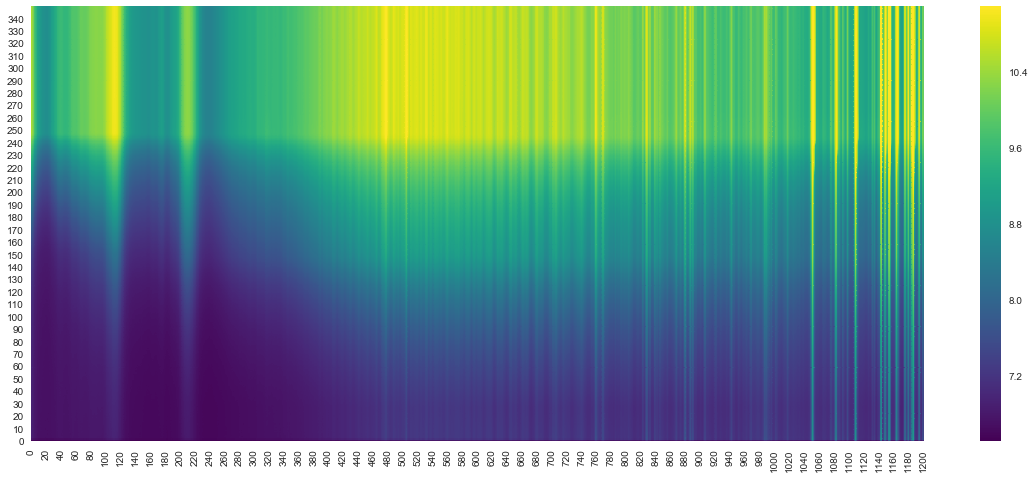

In [178]:
#spot check plot of the last spectra array element showing that the data indeed appears intact & correct
some_spectra_image = X[-1]
ax = sns.heatmap(log(some_spectra_image), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()          

In [179]:
#attempt metric learn w toy that uses every other column to prevent MemoryErrors
X_e2c = X[:,::2]
print (type(X))
print (type(X_e2c))

nsamples,nx,ny = X_e2c.shape

d2_X_e2c = X_e2c.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X_e2c.shape)
print('labels y shape:', len(y))
print(type(X_e2c))
#print('last spectra array \n',X[-1])
                
#print('reshaped d2_X_toy:', d2_X_toy.shape)
#print('labels y_toy shape:', len(y_toy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
reshaped d2_X: (170, 210175)
labels y shape: 170
<class 'numpy.ndarray'>


### PCA w log(df) values as the feature scaler

In [180]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

#use this code snip to preprocess data using minmax scalar
#min_max_scaler = preprocessing.MinMaxScaler()
#d2_X_minmax = min_max_scaler.fit_transform(d2_X)

#this code snip will calculate the number of dimensions for PCA to retain 95% of variance in X
pca = PCA()
pca.fit(log(d2_X))     #this line will run on the flattened d2_X
#pca.fit(d2_X_minmax)  #this line will run on scaled d2_X_minmax
#cumsum = np.cumsum(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)  
d = np.argmax(var1 >= 95) + 1            
print ('The minimum number of dimensions to retain 95% variance = ',d)
print (var1[:10])

The minimum number of dimensions to retain 95% variance =  4
[ 46.34  86.88  92.64  95.78  96.93  97.7   98.1   98.42  98.68  98.87]


(0, 15)

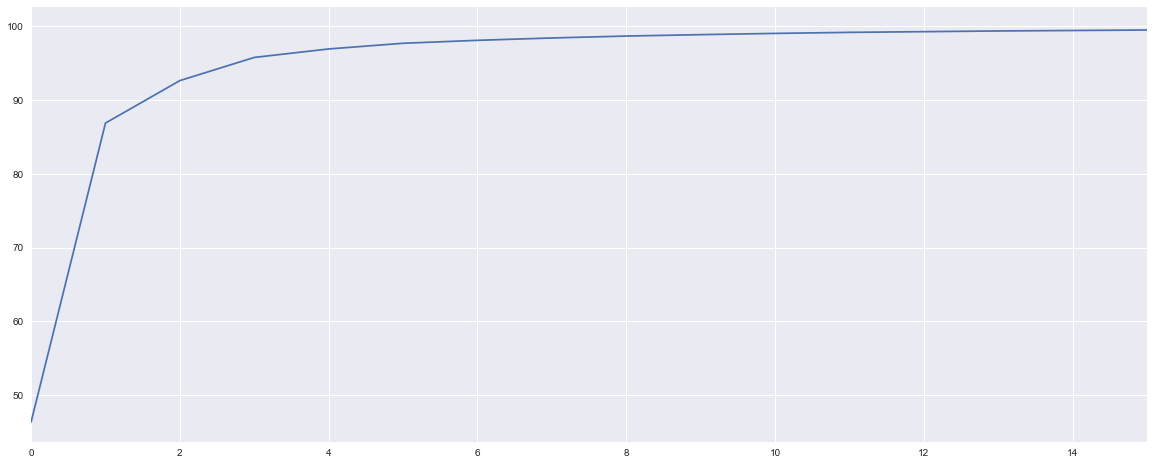

In [181]:
# Let's plot the explained variance vs dimensions
plt.plot(var1)
plt.xlim([0,15])
#note the dimensions start at 0, so 95% is +1

In [190]:
# we will run PCA formatted to retain 90% of variance by inserting value between 0-1.  
# this will get us to 3D in this short example.
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(log(d2_X))   # using log transform of data
print (X_reduced.shape)
print (y.shape)

(170, 4)
(170,)


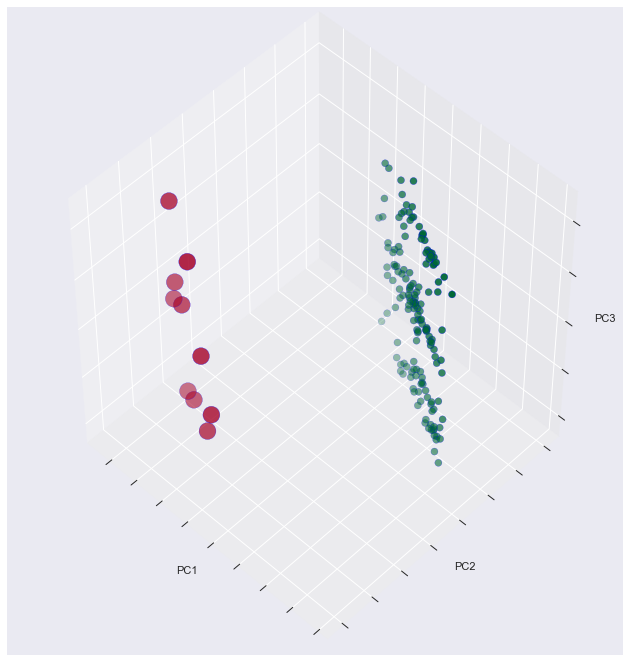

In [183]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(9, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
area = 50+75*np.pi*y

#for name, label in [('normal', 0), ('Anomaly', 1)]:
#    ax.text3D(X_reduced[y == label, 0].mean(), X_reduced[y == label, 1].mean()+1.5, s = name, z = 0,
#              horizontalalignment='center', verticalalignment='center',
#              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
z = np.choose(y, [1,0])

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:,2], c=z, cmap=plt.cm.RdYlGn, s = area, edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
    

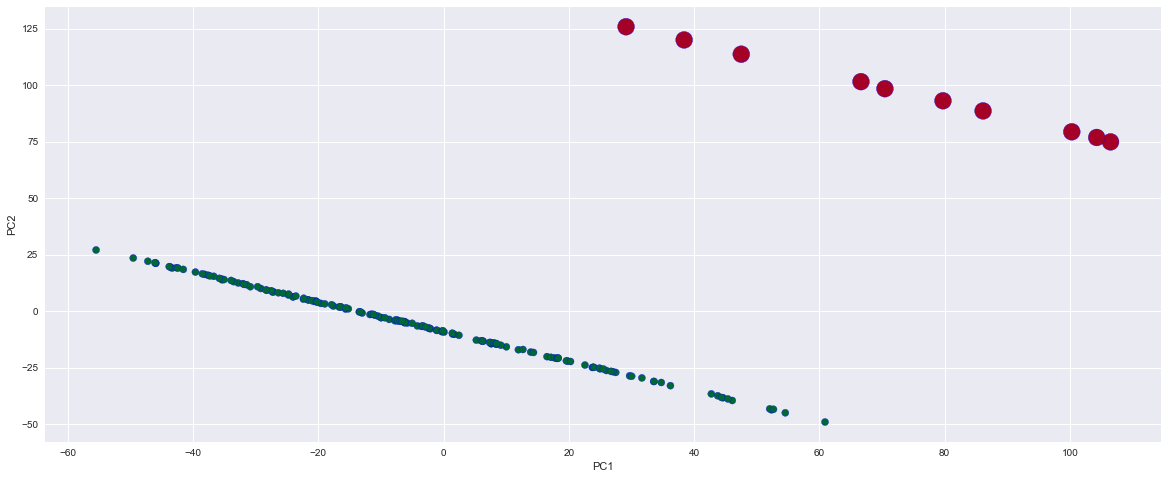

In [184]:
plt.figure()

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('PC1')
plt.ylabel('PC2')

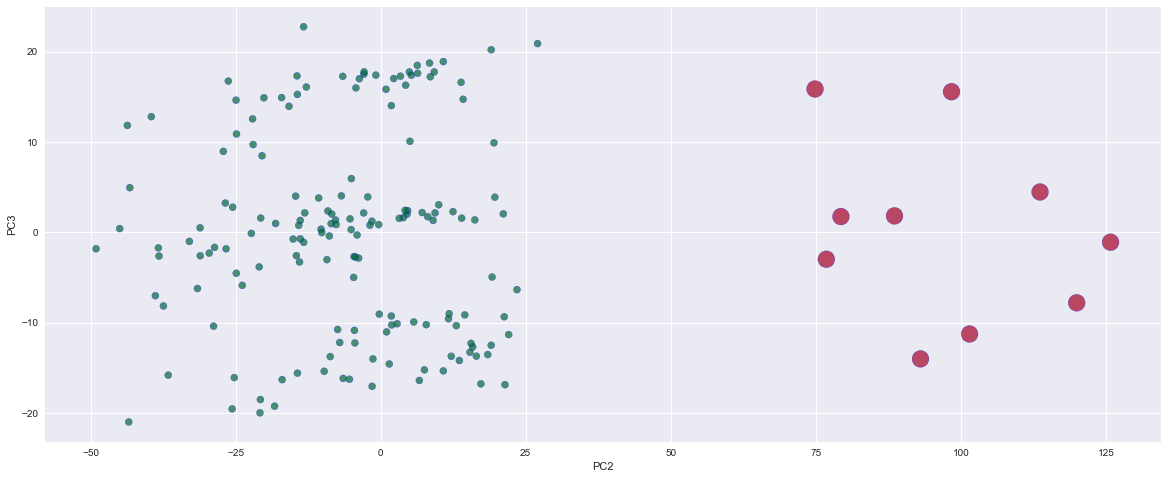

In [185]:
plt.figure()
plt.scatter(X_reduced[:, 1], X_reduced[:, 2], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area, alpha = 0.7)
plt.xlabel('PC2')
plt.ylabel('PC3')

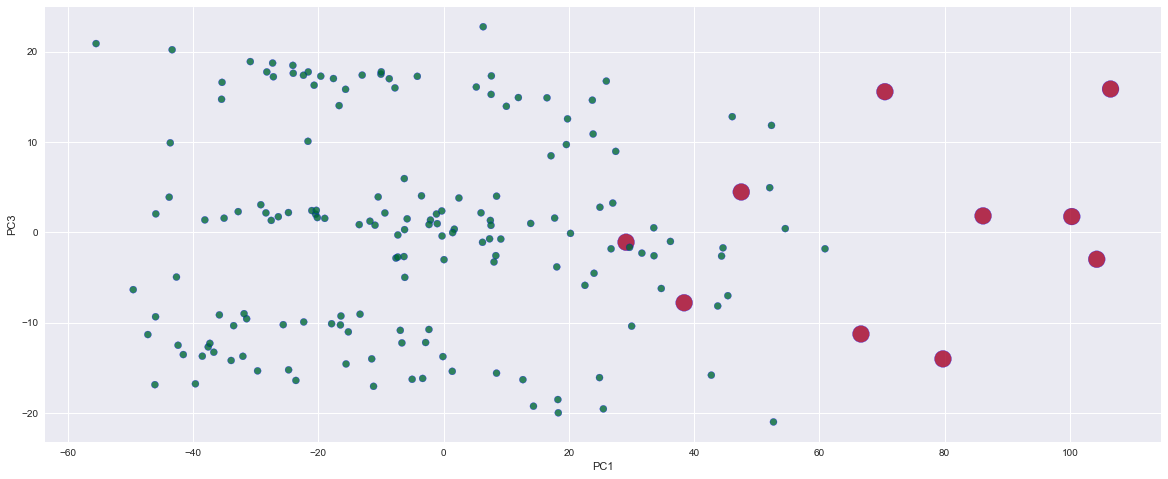

In [186]:
plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 2], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', alpha = 0.8, s = area)
plt.xlabel('PC1')
plt.ylabel('PC3')

### We can clearly see a classifier should be able to give us the correct splits here.


In [200]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import clone
from sklearn.metrics import average_precision_score
from sklearn import tree

sss = StratifiedShuffleSplit(n_splits = 3, test_size = 0.50, random_state = 42)
svm_clf = SVC(kernel = 'rbf', degree = 3, gamma = 0.1, C=0.1)#
#tree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)

for train_index, test_index in sss.split(X_reduced,y):
    clone_clf = clone(svm_clf)
    X_train_folds = X_reduced[train_index]
    y_train_folds = (y[train_index])
    X_test_fold = X_reduced[test_index]
    y_test_fold = (y[test_index])
    print (X_train_folds.shape, y_train_folds.shape)
    print (X_test_fold.shape, y_test_fold.shape)
    
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)  #returns y_pred
    print ('Pred label:', y_pred)
    print ('Test label:', y_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print('Accuracy score:', clone_clf.score(X_test_fold, y_test_fold))
    print('Recall score:', recall_score(y_test_fold, clone_clf.predict(X_test_fold)))
    
    # print ('raw ratio score', n_correct / len(y_pred))
    # y_simtest_score_small = clone_clf.decision_function(X_test_fold)
    # average_precision_small = average_precision_score(y_test_fold, y_simtest_score_small)
    # average_precision_small = average_precision_score(y_test_fold, y_pred)
    # print ('average precision recall score :', average_precision_small)

(85, 4) (85,)
(85, 4) (85,)
Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
Test label: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0]
Accuracy score: 0.941176470588
Recall score: 0.0
(85, 4) (85,)
(85, 4) (85,)
Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
Test label: [0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
Accuracy score: 0.941176470588
Recall score: 0.0
(85, 4) (85,)
(85, 4) (85,)
Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

### Great scores BUT we aren't predicting with good recall.  Ooops, what's the problem?...  We are biased due to the hugely imbalanced dataset.  The classifier is not taking into the balance of classes.  This type of anomaly detection issue warrants investigating use of some data balancing techniques.  Let's try SMOTE.

In [196]:
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, ratio = 1.0)
X_res, y_res = sm.fit_sample(X_reduced, y)
print (np.bincount(y), np.bincount(y_res))


[160  10] [160 160]


C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


### Now we have a balanced  dataset to retry SVC

In [197]:
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.50, random_state = 42)
scores = []
recalls = []

for train_index, test_index in sss.split(X_res,y_res):
    clone_clf = clone(svm_clf)
    X_train_folds = X_res[train_index]
    y_train_folds = (y_res[train_index])
    X_test_fold = X_res[test_index]
    y_test_fold = (y_res[test_index])
    
   
    clone_clf.fit(X_train_folds, y_train_folds)
    score = clone_clf.score(X_test_fold, y_test_fold)
    scores.append(score)
    recall = recall_score(y_test_fold, clone_clf.predict(X_test_fold))
    recalls.append(recall)
    
    print('Accuracy score:', clone_clf.score(X_test_fold, y_test_fold))
    print('Recall score:', recall_score(y_test_fold, clone_clf.predict(X_test_fold)))
    y_pred = clone_clf.predict(X_test_fold)  #returns y_pred
    #print ('Pred label:', y_pred)
    #print ('Test label:', y_test_fold)

print ('avg score:', np.mean(scores))
print ('avg recall:', np.mean(recalls))

Accuracy score: 0.78125
Recall score: 0.5625
Accuracy score: 0.74375
Recall score: 0.4875
Accuracy score: 0.7125
Recall score: 0.425
Accuracy score: 0.64375
Recall score: 0.2875
Accuracy score: 0.5875
Recall score: 0.175
Accuracy score: 0.725
Recall score: 0.45
Accuracy score: 0.79375
Recall score: 0.5875
Accuracy score: 0.73125
Recall score: 0.4625
Accuracy score: 0.725
Recall score: 0.45
Accuracy score: 0.79375
Recall score: 0.5875
avg score: 0.72375
avg recall: 0.4475
